In [3]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [5]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Programs/Datasets/train'
valid_path = '/content/drive/MyDrive/Programs/Datasets/valid'

In [6]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/Programs/Datasets/train/*')

In [9]:
folders

['/content/drive/MyDrive/Programs/Datasets/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___healthy',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Programs/Datasets/train/Tomato___Late_blight']

In [10]:
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Programs/Datasets/valid',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-18-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
1835/1835 [==============================] - 5724s 3s/step - loss: 5.5234 - accuracy: 0.6744 - val_loss: 4.2867 - val_accuracy: 0.7734
Epoch 2/10
1835/1835 [==============================] - 2570s 1s/step - loss: 4.7142 - accuracy: 0.7874 - val_loss: 3.9955 - val_accuracy: 0.8000
Epoch 3/10
1835/1835 [==============================] - 2542s 1s/step - loss: 4.5525 - accuracy: 0.8166 - val_loss: 5.9071 - val_accuracy: 0.7775
Epoch 4/10
1835/1835 [==============================] - 2603s 1s/step - loss: 4.1118 - accuracy: 0.8403 - val_loss: 4.0788 - val_accuracy: 0.8438
Epoch 5/10
1835/1835 [==============================] - 2597s 1s/step - loss: 4.2167 - accuracy: 0.8500 - val_loss: 6.9354 - val_accuracy: 0.8076
Epoch 6/10
1835/1835 [==============================] - 2589s 1s/step - loss: 3.8502 - accuracy: 0.8657 - val_loss: 4.7715 - val_accuracy: 0.8467
Epoch 7/10
1835/1835 [==============================] - 2554s 1s/step - loss: 3.5935 - accuracy: 0.8722 - val_loss: 5.6730 -

In [19]:
import matplotlib.pyplot as plt

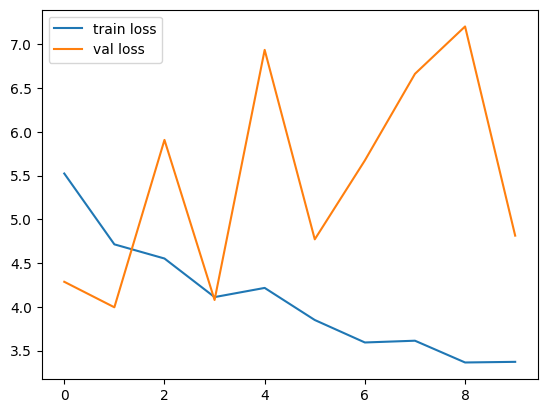

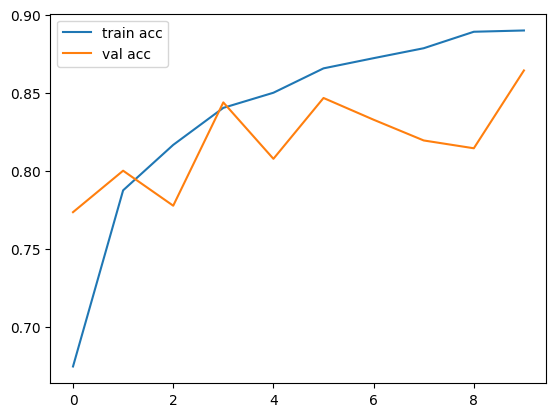

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
y_pred = model.predict(test_set)

459/459 [==============================] - 477s 1s/step


In [ ]:
len(y_pred)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
len(y_pred)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
import os
for i in os.listdir('/content/drive/MyDrive/Programs/Datasets/train/Tomato___Bacterial_spot'):
  print()
# displaying the image
# plt.imshow(testImage)

In [27]:
y_pred

array([7, 2, 4, ..., 6, 0, 1])

In [28]:
# for i in os.listdir('/content/drive/MyDrive/Programs/Datasets/valid'):
#   for j in range(0,20):

#     plt.imshow()

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Programs/Datasets/valid/Tomato___Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG')
plt.imshow(img)
